In [5]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [6]:
env = BlackjackEnv()

In [78]:
def mc_prediction(policy, env, num_episodes, discount_factor=1):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for ep in range(num_episodes):
        observation = env.reset()
        
        done = False
        episode_flow = []
        while not done:
            action = policy(observation)
            obs_next, reward, done, _ = env.step(action)
            episode_flow.append([observation, action, reward])
            observation = obs_next
        
        g = 0
        for t in range(len(episode_flow)-1, -1, -1):
            visited_states = {ep[0] for ep in episode_flow[:t-1]} if t > 0 else {}
            state, _, reward = episode_flow[t]
            g = g * discount_factor**t + reward
            
            if state not in visited_states:
                returns_sum[state] += g
                returns_count[state] += 1
                
                V[state] = returns_sum[state] / returns_count[state]
       
    return V    

In [76]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

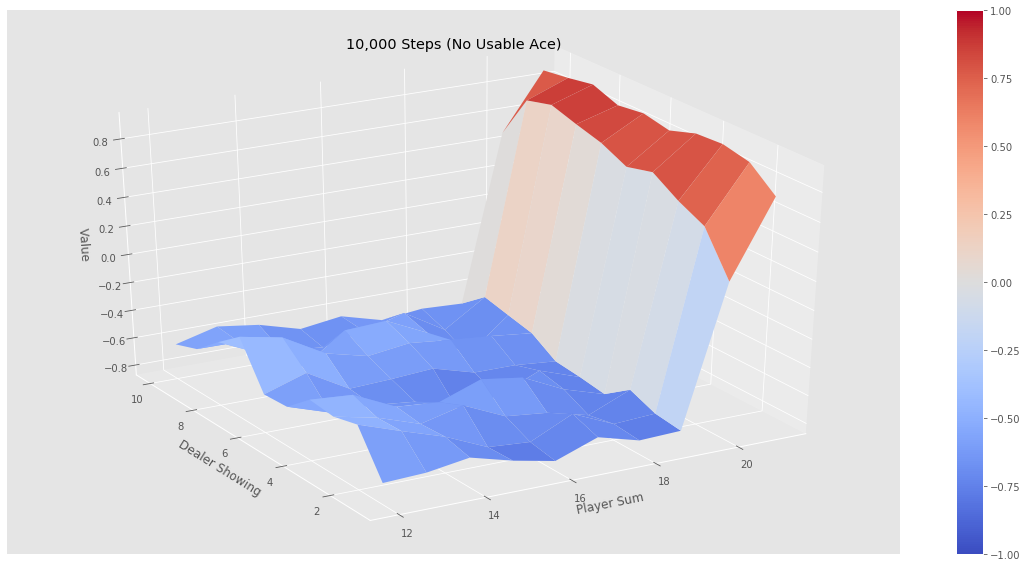

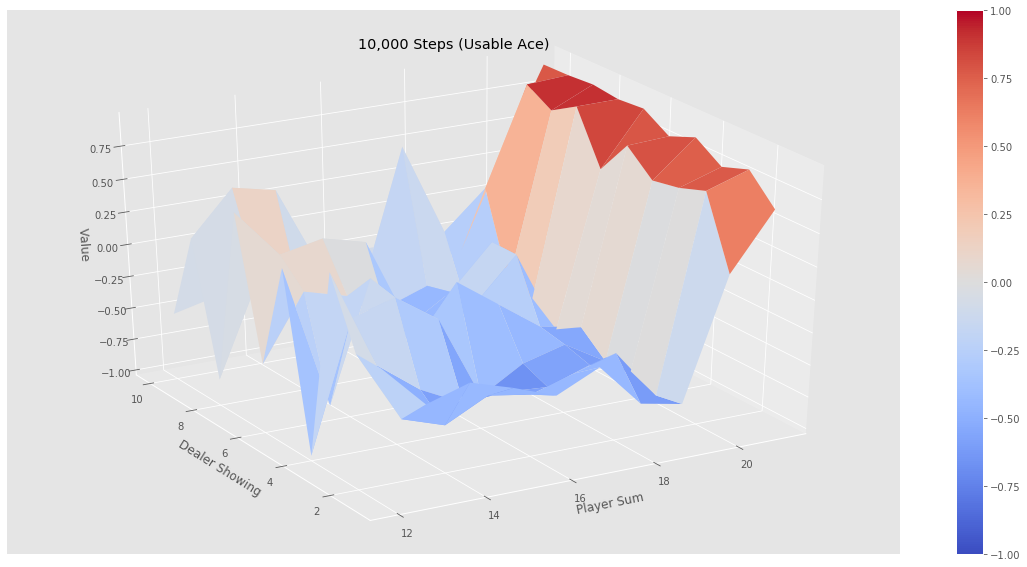

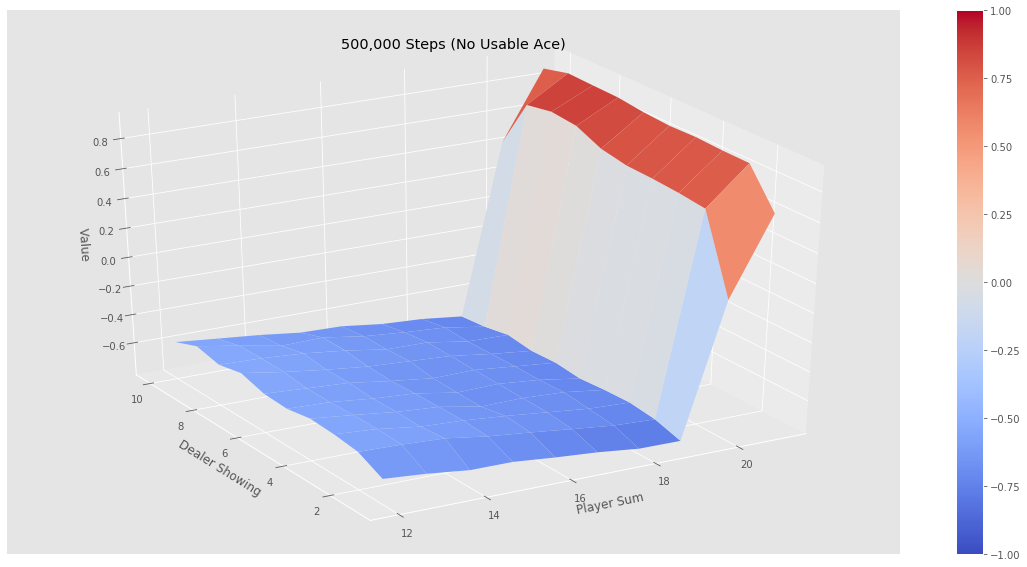

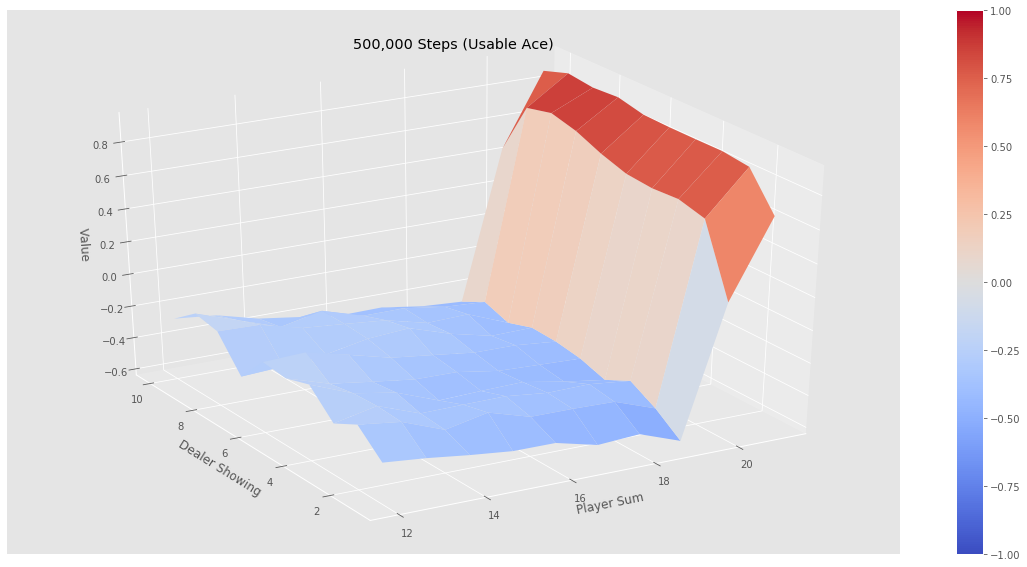

In [77]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)

plotting.plot_value_function(V_500k, title="500,000 Steps")